In [1]:
# import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import machine learning libraries
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [3]:
# importing dataset
df = pd.read_csv('04 - MLReady.csv')
df.sample(5)

,country,date,Daily Vaccinations
641,Belgium,2021-01-22,16090.0
428,Argentina,2021-01-02,8776.0
934,Lithuania,2021-01-31,3592.0
971,Hungary,2020-12-30,1348.0
669,Norway,2021-01-13,3243.0


In [4]:
# setting date as index
df.set_index('date', inplace=True)

In [5]:
# user will input country, so we should make it as variable
# assume we use Italy as input
country = 'Italy'

In [6]:
# creating dataframe containing data from a certain country
data = df[df['country']==country]
data.head(5)

,country,Daily Vaccinations
date,,
2020-12-27,Italy,0.0
2020-12-28,Italy,948.0
2020-12-29,Italy,927.0
2020-12-30,Italy,2150.0
2020-12-31,Italy,7892.0


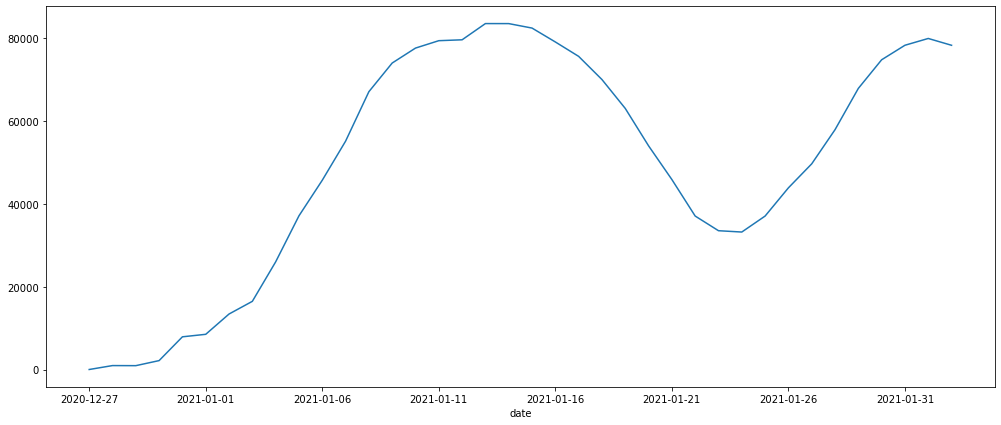

In [7]:
# plotting the data
data['Daily Vaccinations'].plot(figsize=(17,7))
plt.show()

## Checking The Performance

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# splitting train and test set
train = data.iloc[:-10]
test = data.iloc[-10:]

In [10]:
# training the data
model = ARIMA(train['Daily Vaccinations'], order=(0,1,0))
model = model.fit()

In [11]:
# making prediction
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')

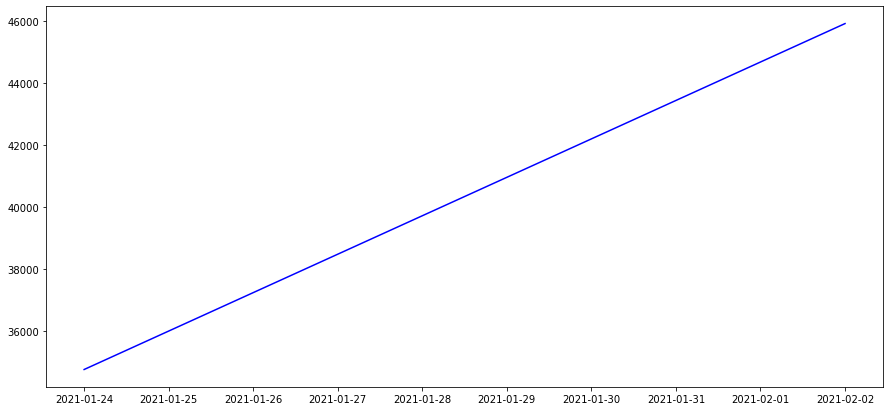

In [12]:
# compare prediction to test set
plt.figure(figsize=(15,7))
plt.plot(pred, color='blue')
plt.show()

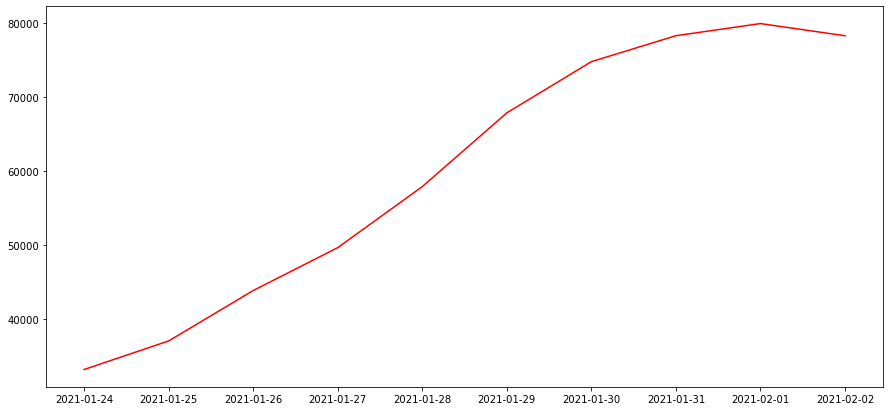

In [13]:
# compare prediction to test set
plt.figure(figsize=(15,7))
plt.plot(test['Daily Vaccinations'], color='red')
plt.show()

In [14]:
# evaluating model
mse = mean_squared_error(pred, test['Daily Vaccinations'])
rmse = sqrt(mse)
r2 = r2_score(pred, test['Daily Vaccinations'])
print("MSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2)

MSE:  579113639.1 
RMSE:  24064.78005509296 
R2:  -44.5791563029359


## Performing Machine Learning

In [15]:
# extraxting data of country population
population = pd.read_csv('02 - Country.csv')
citizenNum = population[population['Country (or dependency)']==country].iloc[0][1]

In [16]:
# providing variables
history = list(data['Daily Vaccinations'])
vaccinated = data['Daily Vaccinations'].sum()
day = 0

# looping to find number of vaccinated citizen
while vaccinated < 80/100*citizenNum:
    model = ARIMA(history, order=(0,1,0))
    model = model.fit()
    start = len(history)
    pred = model.predict(start=start, end=start, typ='levels')
    vaccinated += int(pred[0])
    history.append(int(pred[0]))
    day += 1

In [17]:
# how many days we need to vaccinate at least 80% of population?
day

176